In [1]:
#pH: pH of the water (measured in pH units).
#Hardness: Hardness of the water (measured in mg/L).
#Solids: Total dissolved solids in the water (measured in ppm).
#Chloramines: Amount of chloramines in the water (measured in ppm).
#Sulfate: Amount of sulfate in the water (measured in mg/L).
#Conductivity: Conductivity of the water (measured in μS/cm).
#Organic_carbon: Amount of organic carbon in the water (measured in ppm).
#Trihalomethanes: Amount of trihalomethanes in the water (measured in μg/L).
#Turbidity: Turbidity of the water (measured in NTU).
#Potability: Potability of the water (1 indicates potable, 0 indicates non-potable).

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#READING THE FILE
df_water=pd.read_csv("C:\\Users\\yashika\\Downloads\\archive (15)\\water_potability.csv")
df_water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df_water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df_water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [5]:
#GETTING THE BASIC INFO
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
#we observe sulphate,trihalomethanes and ph values are missing.

In [6]:
#sum of missing values in particular columns(ph-491,hardness-781,trilhalomethanes-162)
print(df_water.isnull().sum())

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [7]:
#DATA CLEANING STEP 1:HANDLE MISSING VALUES
#we will check the % of missing values
print(100*df_water.isnull().sum()/3276)
print("Deleting cols would not be an appropriate option as we will be deleting important features/cols,Also deleting rows would be insigntificant here.")

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64
Deleting cols would not be an appropriate option as we will be deleting important features/cols,Also deleting rows would be insigntificant here.


<Axes: xlabel='ph', ylabel='Density'>

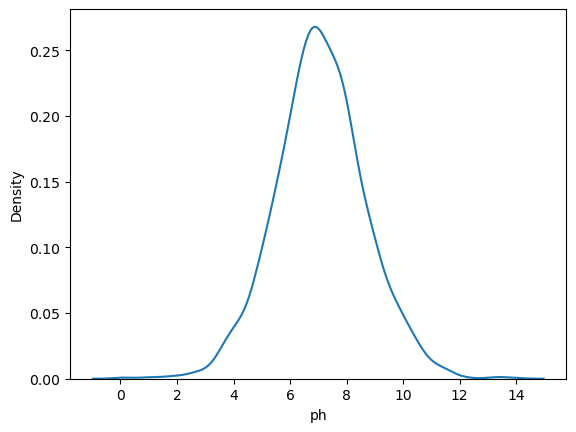

In [8]:
#CHATGPT:Mean/Median Imputation: Use these methods when the distribution of the data 
#is approximately normal or not heavily skewed.Median imputation is often preferred 
#when the data contains outliers, as it's less sensitive to extreme values.
import seaborn as sns
sns.kdeplot(df_water.ph)

<Axes: xlabel='Sulfate', ylabel='Density'>

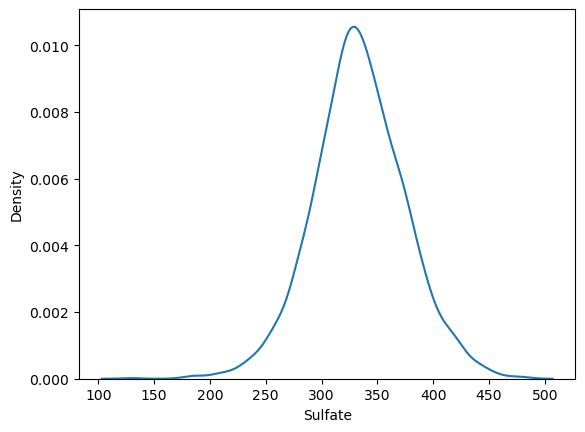

In [9]:
sns.kdeplot(df_water.Sulfate)

<Axes: xlabel='Trihalomethanes', ylabel='Density'>

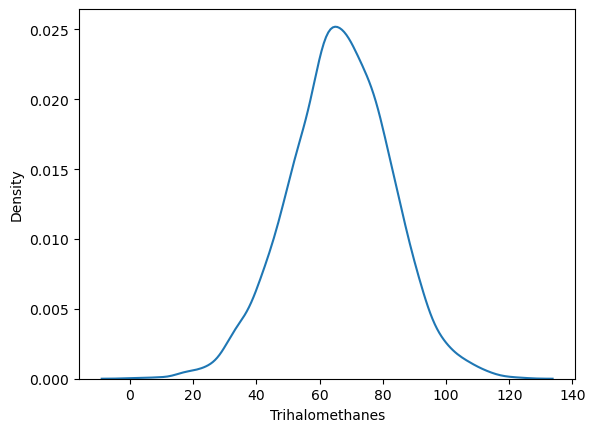

In [10]:
sns.kdeplot(df_water.Trihalomethanes)

<Axes: >

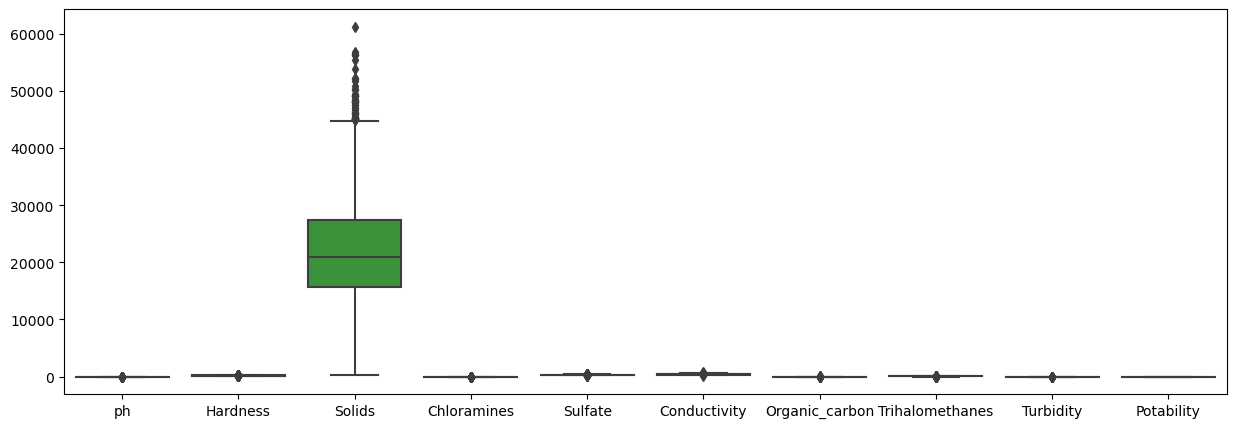

In [12]:
# to decide out of mean and median lets check for outliers
plt.figure(figsize=(15,5))
sns.boxplot(df_water)

In [14]:
#we observed that only solid columns have outliers we will surely treat it but
#as ph,trihalomethanes and sulfate dont have any outliers lets fill those col with mean

In [13]:
#to check certain statistics
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [14]:
df_water['ph'].mean()

7.080794504276835

In [15]:
df_water['ph']=df_water['ph'].fillna(df_water['ph'].mean())

In [16]:
print(df_water.isnull().sum())

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [17]:
df_water['Sulfate'].mean()

333.7757766108135

In [18]:
df_water['Sulfate']=df_water['Sulfate'].fillna(df_water['Sulfate'].mean())

In [19]:
print(df_water.isnull().sum())

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [20]:
df_water['Trihalomethanes'].mean()

66.39629294676803

In [21]:
df_water['Trihalomethanes']=df_water['Trihalomethanes'].fillna(df_water['Trihalomethanes'].mean())

In [22]:
print(df_water.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [23]:
print(df_water.Solids.skew())

0.6216344855169127


In [25]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df_water['Solids'])

# Identify outliers (using a threshold of 3)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_indices


(array([ 283,  366,  546,  666, 1031, 1068, 1077, 1186, 1554, 1746, 1784,
        1955, 2497, 2602, 3014, 3130, 3150, 3162, 3190, 3226], dtype=int64),)

In [26]:
cleaned_df = df_water.drop(df_water.index[outlier_indices])
df_water=cleaned_df

In [27]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000,3256.000000
mean,7.080845,196.431872,21827.840935,7.128982,333.896923,426.203585,14.286245,66.354578,3.967191,0.388821
std,1.460770,32.815606,8461.651274,1.579431,35.890759,80.879918,3.312300,15.766100,0.779735,0.487557
min,0.227499,47.432000,320.942611,0.352000,180.206746,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.961992,15617.966076,6.133588,317.273539,365.726221,12.064863,56.524092,3.440160,0.000000
50%,7.080795,197.039446,20863.398168,7.133077,333.775777,421.926811,14.216595,66.396293,3.954840,0.000000
75%,7.860374,216.674288,27194.313643,8.117140,350.398274,481.792304,16.560201,76.623913,4.500320,1.000000
max,14.000000,323.124000,48204.172192,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

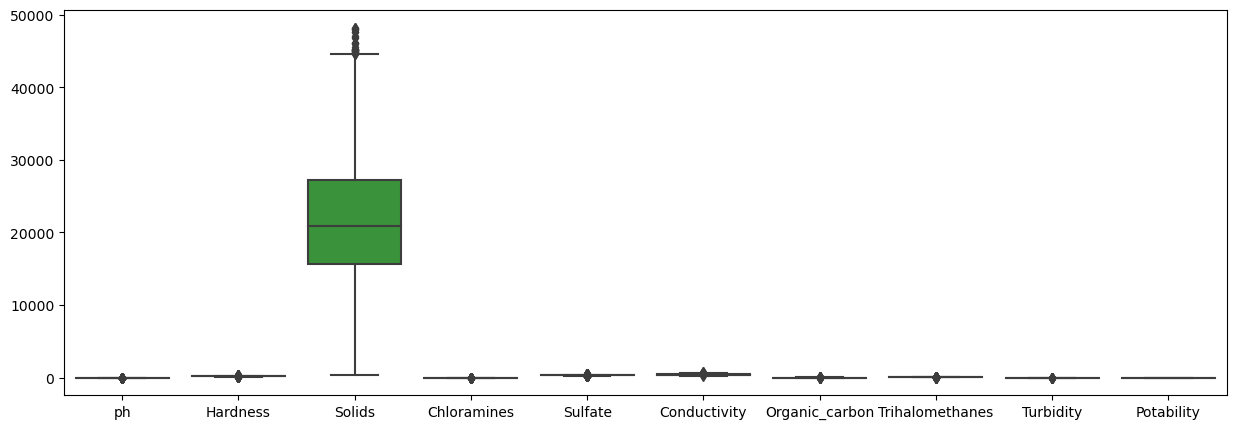

In [28]:
#again checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(df_water)

In [29]:
# Calculate Z-scores
z_scores = stats.zscore(df_water['Solids'])

# Identify outliers (using a threshold of 3)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_indices

(array([ 983, 1335, 2000, 2666, 2744, 3216, 3251], dtype=int64),)

In [30]:
cleaned_df = df_water.drop(df_water.index[outlier_indices])
df_water=cleaned_df

In [31]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000,3249.000000
mean,7.084040,196.400643,21771.632793,7.128316,333.925669,426.145103,14.289657,66.364320,3.966739,0.388427
std,1.457901,32.793280,8383.539121,1.580262,35.897369,80.829964,3.309370,15.774948,0.779703,0.487468
min,0.227499,47.432000,320.942611,0.352000,180.206746,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.280978,176.939676,15613.160533,6.132546,317.280210,365.739122,12.065963,56.532387,3.439740,0.000000
50%,7.080795,197.028926,20852.764496,7.132154,333.775777,421.879854,14.219303,66.396293,3.954964,0.000000
75%,7.861178,216.673869,27172.893573,8.117114,350.401849,481.737559,16.563116,76.631186,4.500208,1.000000
max,14.000000,323.124000,47022.745845,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

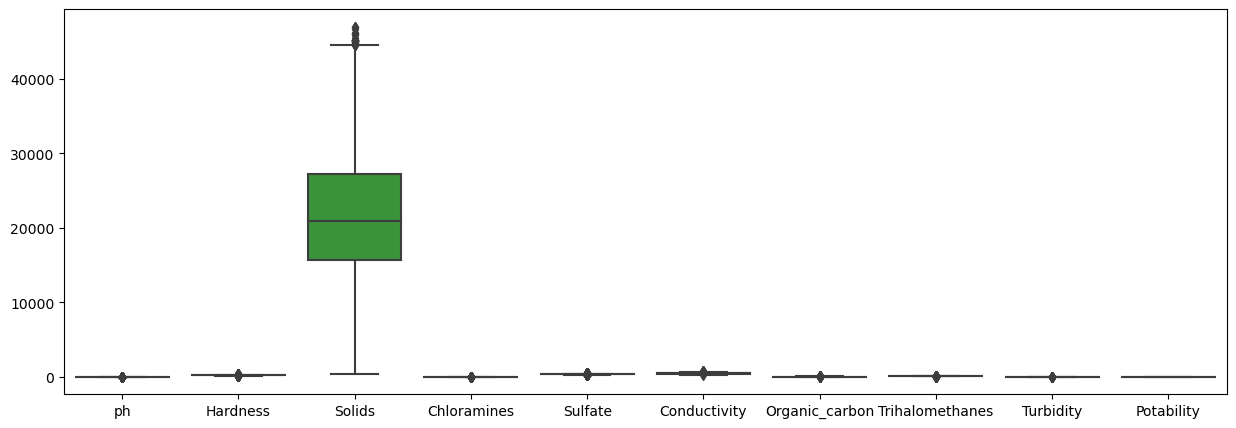

In [32]:
#again checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(df_water)

In [33]:
# Calculate Z-scores
z_scores = stats.zscore(df_water['Solids'])

# Identify outliers (using a threshold of 3)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_indices

(array([ 403, 1970], dtype=int64),)

In [34]:
cleaned_df = df_water.drop(df_water.index[outlier_indices])
df_water=cleaned_df

In [35]:
df_water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000,3247.000000
mean,7.083841,196.375108,21756.107273,7.127881,333.962084,426.061070,14.289388,66.360464,3.966832,0.388051
std,1.458305,32.765258,8362.735123,1.580622,35.877115,80.783769,3.310366,15.779002,0.779898,0.487381
min,0.227499,47.432000,320.942611,0.352000,180.206746,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.280942,176.917854,15605.400708,6.132339,317.301524,365.713321,12.065640,56.515797,3.439682,0.000000
50%,7.080795,197.028926,20849.190737,7.131704,333.775777,421.664482,14.217373,66.396293,3.954964,0.000000
75%,7.862914,216.669594,27161.421110,8.116441,350.416395,481.411301,16.563141,76.632992,4.500432,1.000000
max,14.000000,323.124000,46718.555965,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: >

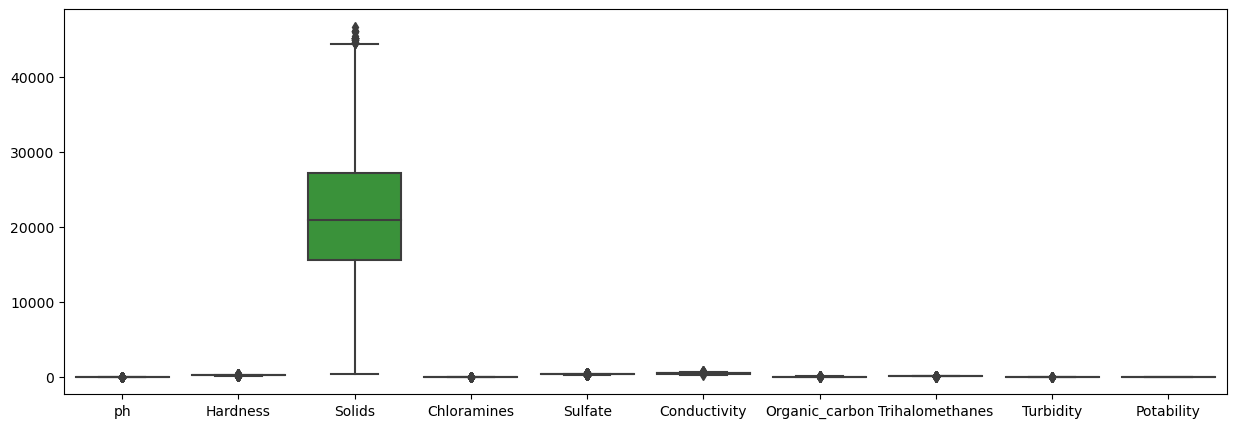

In [36]:
#again checking outliers
plt.figure(figsize=(15,5))
sns.boxplot(df_water)

In [37]:
# Calculate Z-scores
z_scores = stats.zscore(df_water['Solids'])

# Identify outliers (using a threshold of 3)
outlier_indices = np.where(np.abs(z_scores) > 3)
outlier_indices

(array([], dtype=int64),)

In [38]:
print(df_water.Solids.skew())

0.42885314377533446


In [39]:
df_water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.081322,-0.080590,-0.029417,0.018665,0.020996,0.039469,0.003736,-0.034834,-0.009757
Hardness,0.081322,1.000000,-0.047991,-0.032683,-0.092503,-0.027621,0.004356,-0.016304,-0.016199,-0.017418
Solids,-0.080590,-0.047991,1.000000,-0.060145,-0.140427,0.008676,0.015163,-0.017490,0.020860,0.021394
Chloramines,-0.029417,-0.032683,-0.060145,1.000000,0.017452,-0.021237,-0.014634,0.016381,0.001944,0.026364
Sulfate,0.018665,-0.092503,-0.140427,0.017452,1.000000,-0.009649,0.022959,-0.023391,-0.005170,-0.014290
Conductivity,0.020996,-0.027621,0.008676,-0.021237,-0.009649,1.000000,0.022334,0.002133,0.003726,-0.011595
Organic_carbon,0.039469,0.004356,0.015163,-0.014634,0.022959,0.022334,1.000000,-0.013631,-0.024869,-0.030332
Trihalomethanes,0.003736,-0.016304,-0.017490,0.016381,-0.023391,0.002133,-0.013631,1.000000,-0.023331,0.005605
Turbidity,-0.034834,-0.016199,0.020860,0.001944,-0.005170,0.003726,-0.024869,-0.023331,1.000000,0.003103
Potability,-0.009757,-0.017418,0.021394,0.026364,-0.014290,-0.011595,-0.030332,0.005605,0.003103,1.000000


<Axes: >

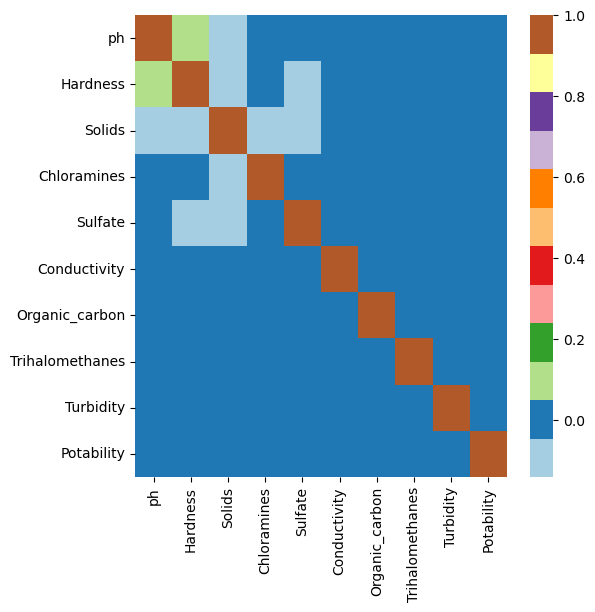

In [41]:
plt.figure(figsize=(6,6))
sns.heatmap(df_water.corr(),cmap='Paired')

<Axes: >

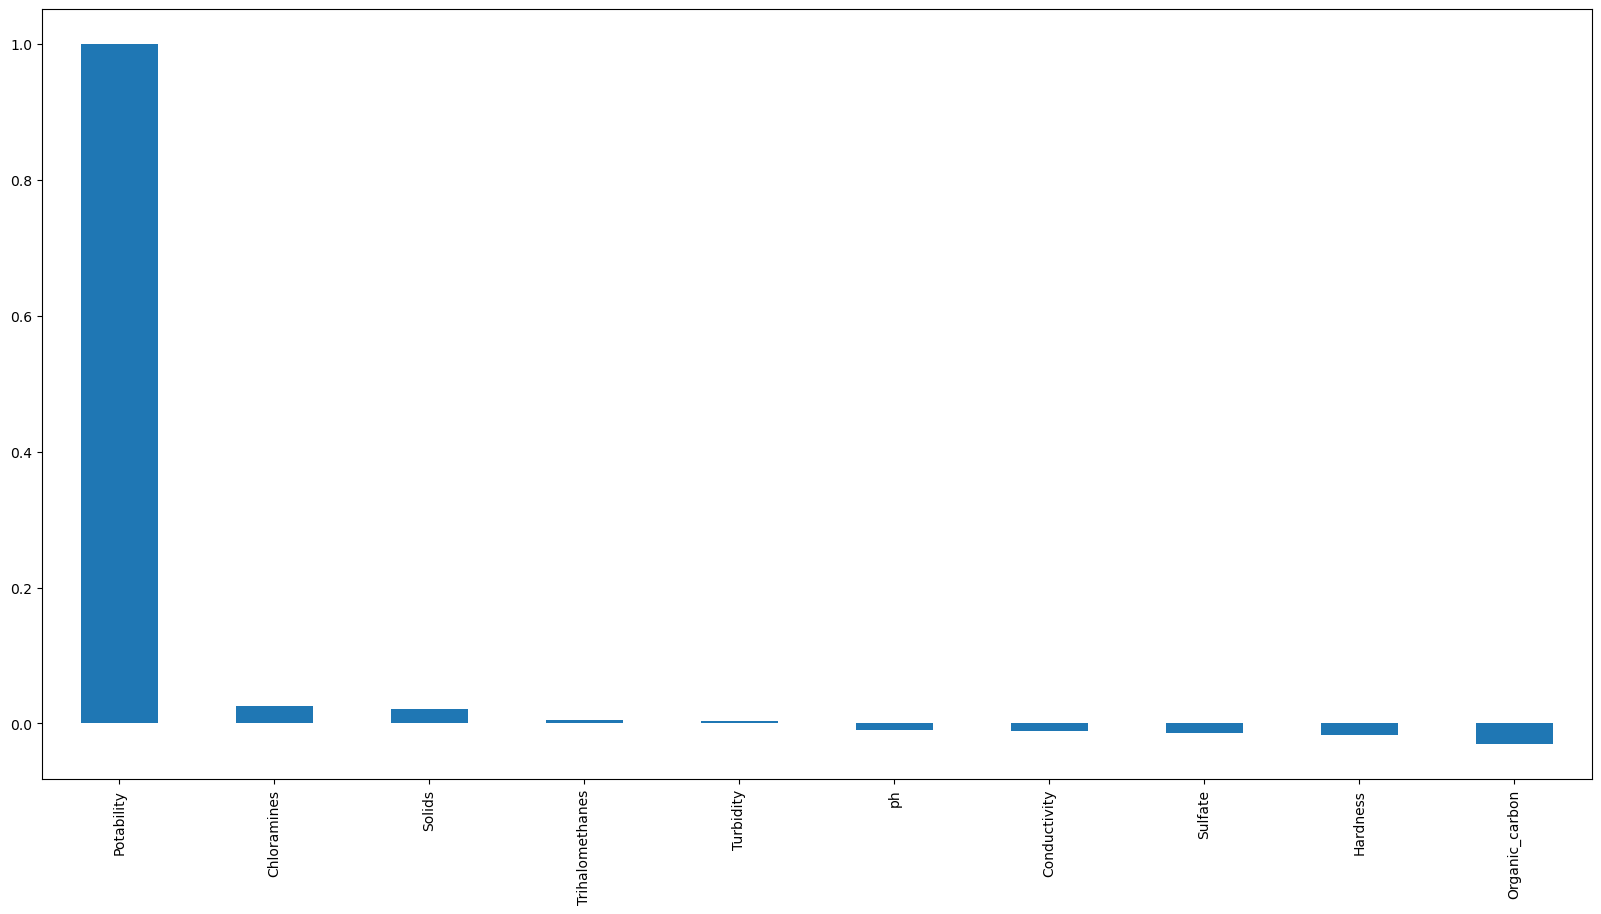

In [40]:
plt.figure(figsize=(20,10))
df_water.corr()['Potability'].sort_values(ascending=False).plot(kind='bar')

In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
#bivariate analysis
list=["ph","Hardness","Solids","Chloramines","Sulfate","Conductivity","Organic_Carbon","Trihalomethanes","Turbidity"]

In [53]:
numerical_columns = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes", "Turbidity"]
for column in numerical_columns:
    correlation = df_water['Potability'].corr(df_water[column])
    print(f'Correlation between Potability and {column}: {correlation}\n')

Correlation between Potability and ph: -0.009756848408120827

Correlation between Potability and Hardness: -0.017418270094395723

Correlation between Potability and Solids: 0.021394103785280963

Correlation between Potability and Chloramines: 0.026364395846158614

Correlation between Potability and Sulfate: -0.014290209297546146

Correlation between Potability and Conductivity: -0.011595161731510636

Correlation between Potability and Organic_carbon: -0.030332097144863242

Correlation between Potability and Trihalomethanes: 0.0056047611066296675

Correlation between Potability and Turbidity: 0.0031029421149995533



In [54]:
#pH: The correlation coefficient between pH and Potability is approximately -0.0098, indicating a very weak negative correlation. This suggests that there is little to no relationship between the pH level of the water and its potability.
#Hardness: The correlation coefficient between hardness and Potability is approximately -0.0174, indicating a weak negative correlation. This suggests that there might be a slight tendency for less hard water to be more potable, but the relationship is not very strong.
#Solids: The correlation coefficient between solids and Potability is approximately 0.0214, indicating a weak positive correlation. This suggests that there might be a slight tendency for higher levels of total dissolved solids to be associated with potable water, but again, the relationship is not very strong.
#Chloramines: The correlation coefficient between chloramines and Potability is approximately 0.0264, indicating a weak positive correlation. This suggests that there might be a slight tendency for higher levels of chloramines to be associated with potable water.
#Sulfate: The correlation coefficient between sulfate and Potability is approximately -0.0143, indicating a weak negative correlation. This suggests that there might be a slight tendency for lower levels of sulfate to be associated with potable water.
#Conductivity: The correlation coefficient between conductivity and Potability is approximately -0.0116, indicating a weak negative correlation. This suggests that there might be a slight tendency for lower conductivity to be associated with potable water.
#Organic Carbon: The correlation coefficient between organic carbon and Potability is approximately -0.0303, indicating a weak negative correlation. This suggests that there might be a slight tendency for lower levels of organic carbon to be associated with potable water.
#Trihalomethanes: The correlation coefficient between trihalomethanes and Potability is approximately 0.0056, indicating a very weak positive correlation. This suggests that there is little to no relationship between the level of trihalomethanes and water potability.
#Turbidity: The correlation coefficient between turbidity and Potability is approximately 0.0031, indicating a very weak positive correlation. This suggests that there is little to no relationship between turbidity and water potability.